In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style='whitegrid', palette='muted')
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

## Data Creation

In [2]:
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))
time.shape, sin.shape

((1000,), (1000,))

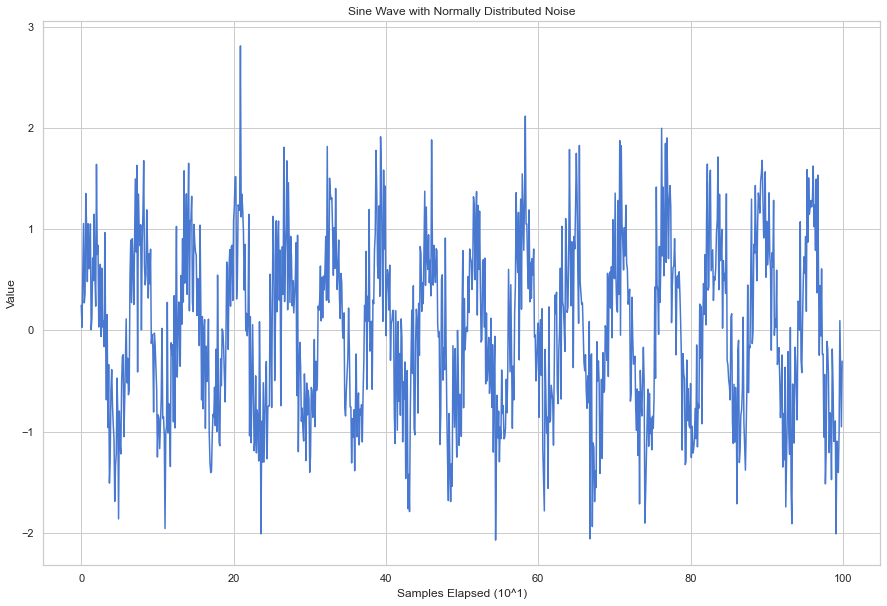

In [3]:
plt.figure(figsize=(15, 10))
plt.title('Sine Wave with Normally Distributed Noise')
plt.plot(time, sin, label='Sine wave with noise')
plt.xlabel('Samples Elapsed (10^1)')
plt.ylabel('Value')
plt.show()

## Data Preprocessing

In [4]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
df.head()

,sine
0.0,0.248357
0.1,0.030701
0.2,0.522514
0.3,1.057035
0.4,0.272342


In [7]:
train_size = int(len(df)*0.7)
val_size = int(len(df)*0.2)
test_size = len(df) - train_size - val_size
train, val, test = df.iloc[0:train_size], df.iloc[train_size:(train_size+val_size)], df.iloc[(train_size+val_size):len(df)]
len(train), len(val), len(test)

(700, 200, 100)

In [9]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i+time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_train, y_train = create_dataset(train, train.sine, time_steps)
X_val, y_val = create_dataset(val, val.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)

X_train.shape, y_train.shape

((690, 10, 1), (690,))

## Modelling

In [17]:
def generate_model():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
        tf.keras.layers.Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001))
    return model

model = generate_model()
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    verbose=1,
    shuffle=False
)

Epoch 1/30
44/44 [==============================] - 0s 8ms/step - loss: 0.4029
Epoch 2/30
44/44 [==============================] - 0s 7ms/step - loss: 0.3267
Epoch 3/30
44/44 [==============================] - 0s 8ms/step - loss: 0.3200
Epoch 4/30
44/44 [==============================] - 0s 7ms/step - loss: 0.3189
Epoch 5/30
44/44 [==============================] - 0s 7ms/step - loss: 0.3179
Epoch 6/30
44/44 [==============================] - 0s 7ms/step - loss: 0.3172
Epoch 7/30
44/44 [==============================] - 0s 7ms/step - loss: 0.3165
Epoch 8/30
44/44 [==============================] - 0s 7ms/step - loss: 0.3158
Epoch 9/30
44/44 [==============================] - 0s 7ms/step - loss: 0.3151
Epoch 10/30
44/44 [==============================] - 0s 7ms/step - loss: 0.3143
Epoch 11/30
44/44 [==============================] - 0s 7ms/step - loss: 0.3136
Epoch 12/30
44/44 [==============================] - 0s 7ms/step - loss: 0.3129
Epoch 13/30
44/44 [==============================

<function matplotlib.pyplot.show(close=None, block=None)>

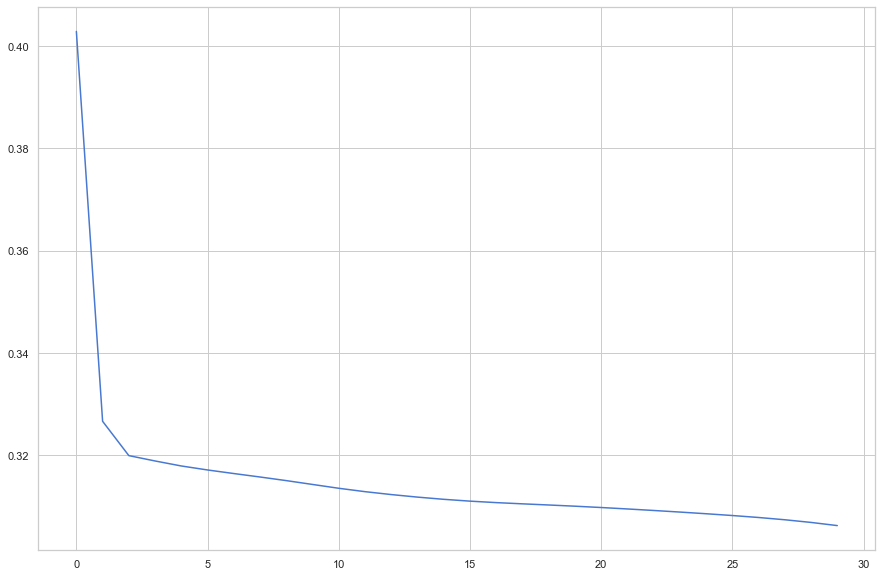

In [20]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.show

In [21]:
y_pred_val = model.predict(X_val)

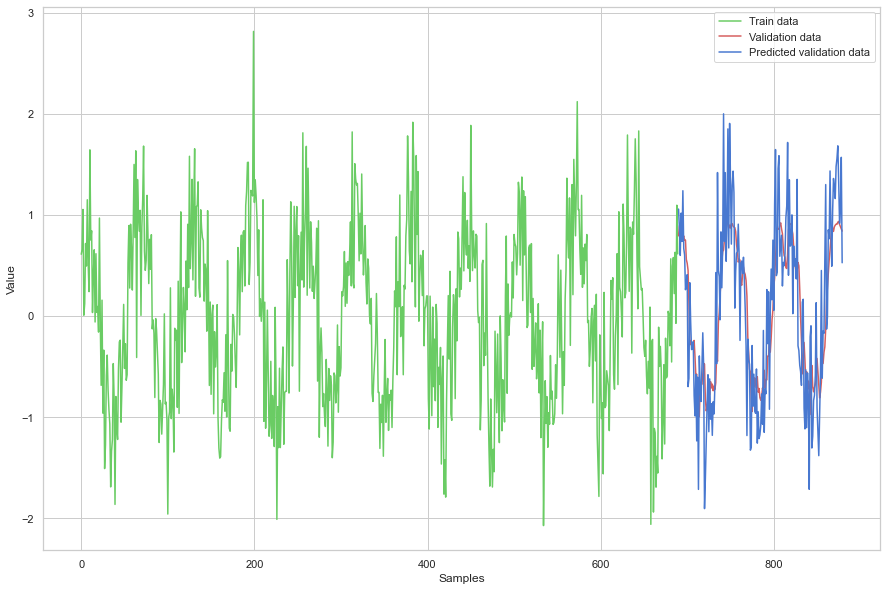

In [24]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(0, len(y_train)), y_train, 'g')
plt.plot(np.arange(len(y_train), (len(y_train)+len(y_pred_val))), y_pred_val, 'r')
plt.plot(np.arange(len(y_train), (len(y_train)+len(y_pred_val))), y_val, 'b')
plt.legend(['Train data', 'Validation data', 'Predicted validation data'])
plt.xlabel('Samples')
plt.ylabel('Value')
plt.show()